# PyTorch to Keras  
### Import des bibliothèques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas


import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor


import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Input
from keras import layers, Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist


2024-02-24 15:56:41.424235: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-24 15:56:41.462423: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-24 15:56:41.462453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-24 15:56:41.463351: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-24 15:56:41.469390: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructio

### 

In [2]:
# model Keras
def Model1():
    inputs = keras.layers.Input(shape=(7,), name="entrée")
    neuron = keras.layers.Dense(units=2,activation="relu", use_bias=True, name="couche1")(inputs)
    model = keras.Model(inputs=inputs, outputs=neuron)
    model.compile(optimizer="sgd", loss='mean_squared_error', metrics=["accuracy"])
    
    return model


In [3]:
model = Model1()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entrée (InputLayer)         [(None, 7)]               0         
                                                                 
 couche1 (Dense)             (None, 2)                 16        
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# chager fichier notes 
MyData=pandas.read_csv('notes.csv')
MyData.pop('Eleves')
Matieres = list(MyData.keys())
print(Matieres)

Notes=MyData.to_numpy()
print(Notes)
# chager fichier notes 

['Mathematiques', 'Physiques', 'Informatique', 'LV1', 'LV2', 'Biologie', 'Chimie']
[[14.3 13.8 15.7 14.1 12.5 16.2 14.6]
 [13.9 14.2 15.4 13.7 13.2 15.9 14.8]
 [16.5 15.7 17.3 16.1 15.2 16.4 16.9]
 [17.2 16.8 15.9 16.3 15.9 16.7 15.4]
 [13.5 12.9 14.3 13.2 11.8 13.9 13.1]
 [15.6 15.5 16.7 15.4 14.7 16.1 15.8]
 [14.1 13.6 15.2 12.9 13.4 15.  14.3]
 [16.3 16.9 16.1 16.4 16.6 16.2 16.8]
 [14.8 14.4 14.8 14.5 13.8 14.7 14.5]
 [16.7 16.1 16.8 15.8 16.3 16.9 16.3]
 [13.2 13.7 13.1 13.3 12.2 13.5 13.7]
 [15.2 15.9 14.7 15.6 15.5 15.8 15.2]
 [16.1 16.6 16.  15.7 15.8 16.5 16.1]
 [14.  12.8 13.5 12.6 11.3 13.3 13.5]
 [15.9 15.5 15.8 15.3 14.9 16.  15.6]
 [12.6 13.4 13.  13.1 12.8 13.7 12.9]
 [15.  14.7 15.6 15.2 13.7 15.9 15. ]
 [12.9 13.5 12.8 12.3 11.7 13.2 12.5]
 [16.9 16.8 17.6 16.9 16.5 17.2 17. ]
 [15.7 15.6 15.8 15.1 15.6 15.9 15.7]]


#### Prediction Notes PyTorch

In [5]:

## Avec PyTorch ##
Notes_pt=torch.tensor(Notes, dtype=torch.float64)
# defintion de la fonction d'activation ReLU
act_func_relu=torch.nn.ReLU()
# definition de la couche dense et de ses parametres
act_func_relu=torch.nn.ReLU()

# definition de la couche dense et de ses parametres
lin_filter=torch.nn.Linear(7, 2, bias=True)
lin_filter.weight.data=torch.tensor([[0.2,0.2,0.2,0,0,0.2,0.2],[0.0,0.0,0.0,0.5,0.5,0., 0.]], dtype=torch.float64)
lin_filter.bias.data=torch.tensor([-10,-10], dtype=torch.float64)

filtered_data=act_func_relu(lin_filter(Notes_pt[:,:]))
# results
print(filtered_data)


tensor([[4.9200, 3.3000],
        [4.8400, 3.4500],
        [6.5600, 5.6500],
        [6.4000, 6.1000],
        [3.5400, 2.5000],
        [5.9400, 5.0500],
        [4.4400, 3.1500],
        [6.4600, 6.5000],
        [4.6400, 4.1500],
        [6.5600, 6.0500],
        [3.4400, 2.7500],
        [5.3600, 5.5500],
        [6.2600, 5.7500],
        [3.4200, 1.9500],
        [5.7600, 5.1000],
        [3.1200, 2.9500],
        [5.2400, 4.4500],
        [2.9800, 2.0000],
        [7.1000, 6.7000],
        [5.7400, 5.3500]], dtype=torch.float64, grad_fn=<ReluBackward0>)


#### Prediction de notes TensorFlow

In [6]:
print("Nous allons faire la même chose avec Keras")

## call def Model1
model = Model1()
# Definition poids et biais pour couche dense
weights = np.array([[0.2,0.2,0.2,0,0,0.2,0.2],[0.0,0.0,0.0,0.5,0.5,0.,0.]], dtype=np.float64)
bias = np.array([-10, -10], dtype=np.float64)

model.set_weights([weights.T, bias])
print(model.summary())

keras_filtered_data = model.predict(Notes[:,:])
print(keras_filtered_data)
print(filtered_data)


Nous allons faire la même chose avec Keras
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entrée (InputLayer)         [(None, 7)]               0         
                                                                 
 couche1 (Dense)             (None, 2)                 16        
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
1/1 [==============================] - 0s 75ms/step
[[4.92      3.3000002]
 [4.84      3.4499998]
 [6.5599995 5.6499996]
 [6.4000015 6.0999985]
 [3.54      2.5      ]
 [5.9400005 5.049999 ]
 [4.4399996 3.1499996]
 [6.460001  6.5      ]
 [4.6399994 4.1499996]
 [6.5599995 6.049999 ]
 [3.4400005 2.75     ]
 [5.3599997 5.55     ]
 [6.26      5.75     ]
 [3.42      1.9500008]

# Partie 2 
### Prediction images MNIST dataset
#### Code video

In [7]:
def get_with_PyTorch():
    image = Image.open("car.jpg").convert('L')  # 'L' mode converts the image to grayscale
    transform = transforms.Compose([
        transforms.Resize((28, 28)),  
        transforms.ToTensor()])
    # Apply transformations to the image
    image = transform(image)
    image = image.unsqueeze(0)
    # apply filters
    conv_filter=torch.nn.Conv2d(1, 2,3, bias=True)
    conv_filter.weight.data=torch.tensor([[[[-1.,0.,1.], [-1.,0.,1.], [-1.,0.,1.]]]])/3.
    conv_filter.bias.data=torch.tensor([-0.1])
    filtered_image=conv_filter(image)
    processed_image_np = filtered_image.squeeze(0).detach().numpy()
    # Visualize the processed image
    plt.imshow(np.transpose(processed_image_np, (1, 2, 0)), cmap='gray')
    plt.title('PyTorch Processed Image')
    plt.axis('off')
    plt.show()
    plt.close()

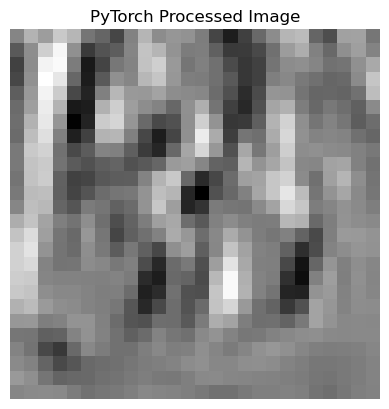

In [8]:
# Transformation image voiture avec PyTorch
get_with_PyTorch()

#### Transformation avec Keras

In [9]:
## Transformation avec Keras     
def get_with_Keras():
    # Load the image
    img = image.load_img("car.jpg", target_size=(28, 28), color_mode="grayscale")    
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = np.expand_dims(img_array, axis=-1)
    img_array = img_array / 255.0
    
    model = KerasModel1()
    weights = np.array([[[[-1., 0., 1.], [-1., 0., 1.], [-1., 0., 1.]]]], dtype=np.float32) / 3.
    bias = np.array([-0.1], dtype=np.float32)
    model.layers[1].set_weights([weights.T, bias])
    filtered_image = model.predict(img_array)
    # Visualize the processed image
    plt.imshow(np.squeeze(filtered_image), cmap='gray',vmin=0, vmax=1)
    plt.title('Keras Processed Image')
    plt.axis('off')
    plt.show()
    plt.close()
        

In [10]:
print(model.summary())


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entrée (InputLayer)         [(None, 7)]               0         
                                                                 
 couche1 (Dense)             (None, 2)                 16        
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [11]:
# Transformation Code video en Keras
def KerasModel1():
    inputs = tf.keras.layers.Input(shape=(None, None, 1), name="input")
    # Add Conv2D layer
    conv_layer = Conv2D(filters=1, kernel_size=(3, 3), activation="relu", use_bias=True, name="conv_layer")(inputs)
    model = keras.Model(inputs=inputs, outputs=conv_layer)
    model.compile(optimizer="sgd", loss='mean_squared_error', metrics=["accuracy"])

    
    return model



1/1 [==============================] - 0s 44ms/step


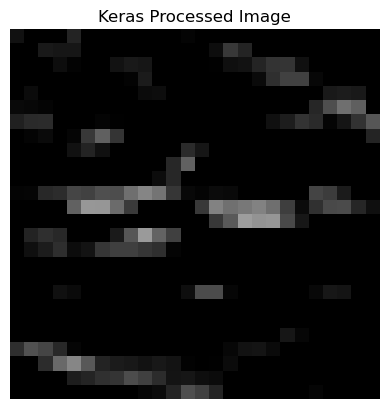

In [12]:
# Transformation image avec Keras
get_with_Keras()


### PyTorch Images MNIST dataset

In [13]:

class PyTorchCNN(nn.Module):
    
    def __init__(self):
        
        super(PyTorchCNN, self).__init__()
        
        #Convolution/ReLU/MaxPooling layers definition
        self.conv1=nn.Conv2d(1,2, kernel_size=2, stride=1, padding=1) # 1 to 2 channels
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # 32x32 to 16x16 pixels
        self.conv2=nn.Conv2d(2,4, kernel_size=2, stride=1, padding=1) # 2 to 4 channels
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # 16x16 to 8x8 pixels
        self.conv3=nn.Conv2d(4,8, kernel_size=2, stride=1, padding=1) # 4 to 8 channels
        self.pool3=nn.MaxPool2d(kernel_size=2, stride=2) # 8x8 to 4x4 pixels
        
        # Dense layers definition
        self.fc1=nn.Linear(8*4*4, 32)
        self.fc2=nn.Linear(32,10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x= self.pool1(x)
        x= F.relu(self.conv2(x))
        x= self.pool2(x)    
        x= F.relu(self.conv3(x))
        x= self.pool3(x)
        x= x.view(-1, 8*4*4)
        x= F.relu(self.fc1(x))
        x= self.fc2(x)
        
        return x

In [14]:
def mnist_transform_PyTorch():
    transform = ToTensor()
    # Load MNIST dataset
    mnist_dataset = datasets.MNIST(root='./data', train=True, download=False, transform=transform)
    X, y = mnist_dataset[11] # doit donner 6
    X = X.unsqueeze(0)  # Add batch dimension
    PyTorchCNN_model = PyTorchCNN()
    pred = PyTorchCNN_model(X)
    predicted_class = torch.argmax(pred)
    image = X.squeeze(0).numpy()

    # Visualize
    plt.imshow(image.squeeze(0), cmap='gray')  # Squeeze the batch dimension for visualization
    plt.title(f'Predicted with Pytorch Model: {predicted_class}')
    plt.axis('off')
    plt.show()
    plt.close()
    

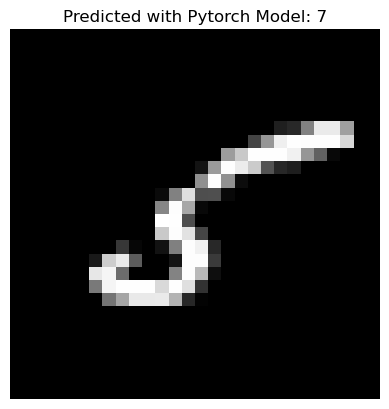

In [15]:
# @title Layers
mnist_transform_PyTorch()


#### Equivalent en Keras 

In [16]:
def KerasCNN():
    # Define input layer
    inputs = Input(shape=(28, 28, 1))

    # Convolutional layers
    x = Conv2D(2, kernel_size=(2, 2), strides=1, padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
    x = Conv2D(4, kernel_size=(2, 2), strides=1, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
    x = Conv2D(8, kernel_size=(2, 2), strides=1, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x) # 10 categories 0 à 9
    model = Model(inputs=inputs, outputs=predictions)
    
    model.summary()  
    
    return model

In [17]:
### Prediction avec Keras

def mnist_transform_Keras():
     # chargement des données MNIST 
    (X_train, y_train), (_, _) = mnist.load_data()
    X = X_train[11]  
    X = np.expand_dims(X, axis=0)  # Add batch dimension
    X = X.astype('float32') / 255
    kerasCNN_model = KerasCNN()
    # prediction
    pred = kerasCNN_model.predict(X)
    predicted_class = np.argmax(pred)

    # Visualisation
    plt.imshow(X.squeeze(0), cmap='gray')  # Squeeze the batch dimension for visualization
    plt.title(f'Predicted with Keras Model: {predicted_class}')
    plt.axis('off')
    plt.show()
    plt.close()
    

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 2)         10        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 2)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 4)         36        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 4)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           136 

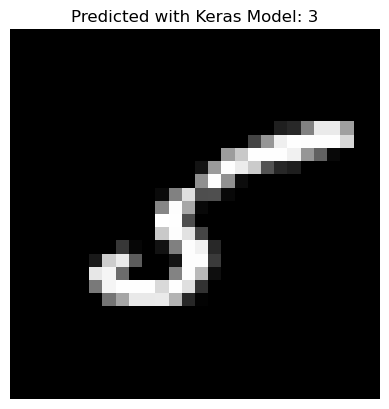

In [18]:
 mnist_transform_Keras()

```Je pense avoir mal transposé le modèle Keras, beaucoup de mauvaises prédictions```